# Basic Exploration of EPEs in CMIP6-HIST Niagara Simulation

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import cftime

time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)

In [2]:
base_path = "/scratch/agmorgan/agm-hist-benchmark-nia/output/{year}/nc_output/CMIP6/CMIP/CP4C/CanESM5-1/historical/r1i1p1f1/"
daily_path = 'day/{var_name}/gn/v20190429/{var_name}_day_CanESM5-1_historical_r1i1p1f1_gn_{year}0101-{year}1231.nc'
year_start = 1980
year_end = 2000
year_range = range(year_start, year_end)

def join_paths(var_name, year_range):
    return [os.path.join(base_path.format(year=my_year), daily_path.format(var_name=var_name, year=my_year)) for my_year in year_range]

# All precip
ds_pr_daily = xr.open_mfdataset(
     join_paths("pr", year_range),
     decode_times = time_coder,
     data_vars = "all", 
)

# Convective precip 
ds_prc_daily = xr.open_mfdataset(
     join_paths("prc", year_range),
     decode_times = time_coder,
     data_vars = "all", 
)

Next we must bin the data. Let's try out one particular year's convective precip. as a sanity check (we expect to see most convective precip. concentrated in the equatorial regions). 

In [3]:
ds_prc_daily_max_1994 = ds_prc_daily.sel(time=ds_prc_daily.time.dt.year.isin(1994)).max(dim="time") # spits out a DataArray 

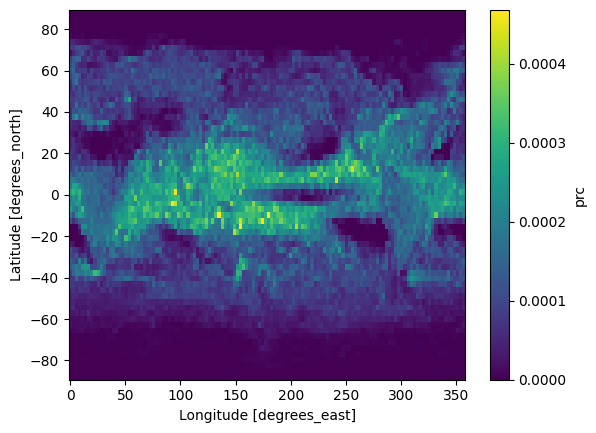

In [4]:
ds_prc_daily_max_1994.prc.plot()
plt.show()

Now we're ready to actually look at all years. Start by taking the daily maximum over each year, and multiplying precipitation rates by $86400$ to convert to mm/day. 

In [5]:
da_eprc = 86400. * ds_prc_daily.prc.groupby("time.year").max(dim="time")
da_epr = 86400. * ds_pr_daily.pr.groupby("time.year").max(dim="time")

First resolved precipitation... 

In [16]:
da_eprr = (da_epr - da_eprc).mean(dim="year")
da_eprr_max = da_eprr.max().values

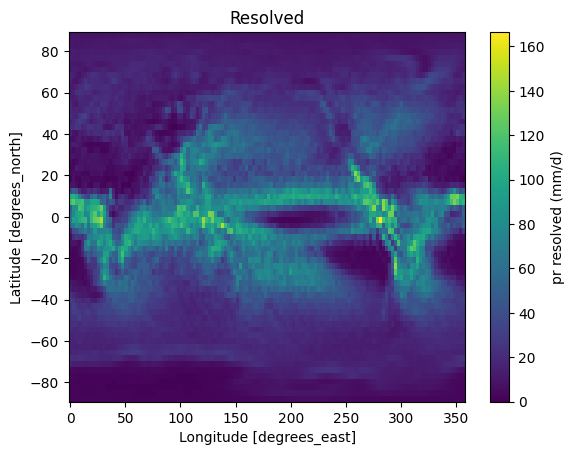

In [18]:
fig, ax = plt.subplots()
CS = da_eprr_avg.plot(vmin=0, vmax=da_eprr_max, cbar_kwargs={"label": "pr resolved (mm/d)"})
plt.title("Resolved")
plt.show()

...and now convective

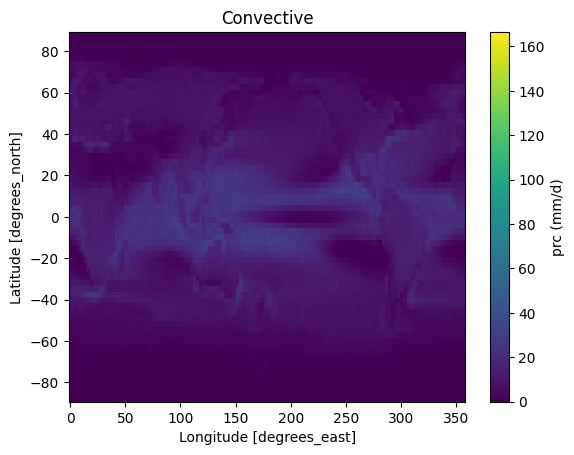

In [19]:
da_eprc.mean(dim="year").plot(vmin=0, vmax=da_eprr_max, cbar_kwargs={"label": "prc (mm/d)"})
plt.title("Convective")
plt.show()

For completeness, here's total precip. too: 

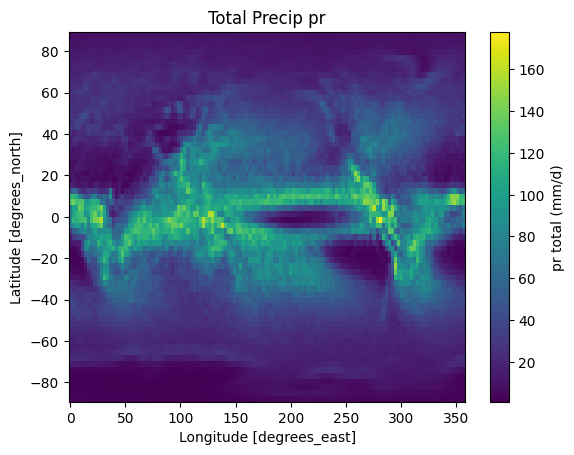

In [20]:
da_epr.mean(dim="year").plot(cbar_kwargs={"label": "pr total (mm/d)"})
plt.title("Total Precip pr")
plt.show()

Note that the dark "holes" in the central Pacific part of the otherwise bright tropical band appear to agree w/ the literature: see for example figure 1a in [Pfahl et al., "Understanding the regional pattern of projected future changes in extreme precipitation", 2017](https://doi.org/10.1038/nclimate3287). 

TODO: switch over to CMocean rain colourmaps! https://matplotlib.org/cmocean/